In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画

In [2]:
# エクセル上で前処理を実施
# 実施した前処理
#　　1 車内気温の空欄を対応する車外気温を条件に絞込み車内気温の平均で埋める
#　　2 Specialsからsnowを抽出しダミー変数として追加
#　　3 重量の記録（搭乗者、残油量）が無い為、refill litersを排除、合わせてrefill gasを排除
#　　4 SpecialsからHalfSunHalfRainをrain=0.5,sun=0.5として設定
#　　5 天候に依存してブレーキを踏む回数が増加するとして　rainとsnowの合計をSlipとして追加
#　　6 Specialsは天候とACのダミー変数で賄えるため排除、sunは車外気温に含まれるとして排除
#　　7 gasTypeをダミー変数として分離し、gasTypeごとのデータ、全て含むデータを作成

#走行距離	消費L	走行速度	車内気温	車外気温	エアコン	スリップ係数(天候によるブレーキ量の係数,晴れ時々雨=0.5、雨=1、雪=2)
df_SP98 = pd.read_csv("measurements4_SP98.csv")[['distance','consume','speed','temp_inside','temp_outside','AC','Slip']]
df_E10 = pd.read_csv("measurements5_E10.csv")[['distance','consume','speed','temp_inside','temp_outside','AC','Slip']]

#走行距離	消費L	走行速度	車内気温	車外気温	エアコン	雨	晴	雪	SP98
df = pd.read_csv("measurements6.csv")[['consume','distance','speed','temp_inside','temp_outside','AC','sun','rain','snow','SP98']]
df['Slip'] = df.rain + df.snow

# のデータ
display(df_SP98.head())
display(df_SP98.describe())
display(df_E10.head())
display(df_E10.describe())
display(df.head())
display(df.describe())

random_Value = 100


,distance,consume,speed,temp_inside,temp_outside,AC,Slip
0,5.4,3.3,32,21.5,7,0,0.0
1,2.0,9.9,21,21.5,4,0,0.0
2,14.2,5.1,32,21.5,7,0,0.0
3,16.0,4.9,25,21.5,8,0,0.0
4,11.8,4.9,25,21.5,11,0,0.0


,distance,consume,speed,temp_inside,temp_outside,AC,Slip
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,18.639912,4.899123,40.820175,21.923246,12.228070,0.100877,0.151316
std,24.179598,1.118408,13.170122,1.181552,7.271373,0.301829,0.392830
min,1.300000,3.300000,16.000000,19.000000,-3.000000,0.000000,0.000000
25%,11.800000,4.200000,32.000000,21.500000,7.000000,0.000000,0.000000
50%,14.150000,4.700000,39.500000,22.000000,11.000000,0.000000,0.000000
75%,18.150000,5.225000,48.000000,22.000000,17.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,2.000000


,distance,consume,speed,temp_inside,temp_outside,AC,Slip
0,28.0,5.0,26,21.5,12,0,0
1,12.0,4.2,30,21.5,13,0,0
2,11.2,5.5,38,21.5,15,0,0
3,12.9,3.9,36,21.5,14,0,0
4,18.5,4.5,46,21.5,15,0,0


,distance,consume,speed,temp_inside,temp_outside,AC,Slip
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,21.096250,4.931250,43.506250,21.918750,10.118750,0.050000,0.106250
std,20.307234,0.900956,14.077949,0.653697,6.392185,0.218629,0.328842
min,1.700000,3.700000,14.000000,21.000000,-5.000000,0.000000,0.000000
25%,12.075000,4.400000,35.000000,21.500000,6.000000,0.000000,0.000000
50%,15.400000,4.800000,42.000000,21.500000,9.000000,0.000000,0.000000
75%,21.200000,5.300000,51.000000,22.500000,14.250000,0.000000,0.000000
max,130.300000,10.800000,88.000000,25.000000,27.000000,1.000000,2.000000


,consume,distance,speed,temp_inside,temp_outside,AC,sun,rain,snow,SP98,Slip
0,5.0,28.0,26,21.5,12,0,0,0,0,0,0
1,4.2,12.0,30,21.5,13,0,0,0,0,0,0
2,5.5,11.2,38,21.5,15,0,0,0,0,0,0
3,3.9,12.9,36,21.5,14,0,0,0,0,0,0
4,4.5,18.5,46,21.5,15,0,0,0,0,0,0


,consume,distance,speed,temp_inside,temp_outside,AC,sun,rain,snow,SP98,Slip
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,4.912371,19.652835,41.927835,21.922388,11.358247,0.079897,0.085052,0.123711,0.010309,0.587629,0.134021
std,1.033172,22.667837,13.598524,0.996424,6.991542,0.271484,0.279319,0.329677,0.101140,0.492897,0.370177
min,3.300000,1.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,11.800000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.700000,14.600000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.300000,19.000000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12.200000,216.100000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [3]:
y_SP98 = df_SP98['consume']
X_SP98 = df_SP98[['distance','speed','temp_inside','temp_outside','AC','Slip']]
y_E10 = df_E10['consume']
X_E10 = df_E10[['distance','speed','temp_inside','temp_outside','AC','Slip']]
y_ALL = df['consume']
X_ALL = df[['distance','speed','temp_inside','temp_outside','AC','sun','rain','snow','SP98']]

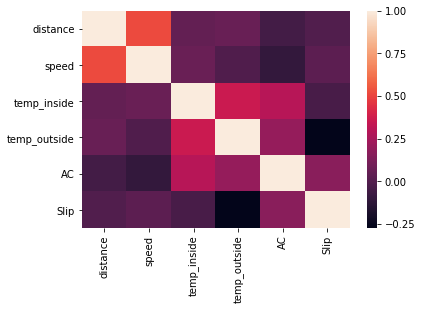

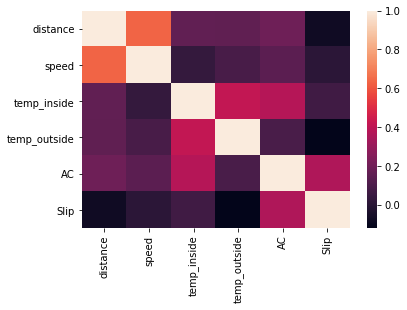

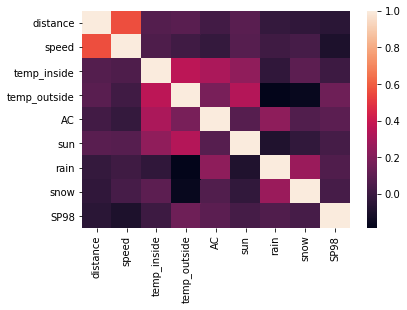

In [4]:
display(sns.heatmap(X_SP98.corr()))
plt.show()
display(sns.heatmap(X_E10.corr()))
plt.show()
display(sns.heatmap(X_ALL.corr()))
plt.show()


# 各モデルの実装

In [5]:
# 各モデルの実装
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

def lassoTest(_X,_y,_alpha,_random = -1):
    if _random == -1:
        random = np.random.randint(0,high=999999999)
    else:
        random = _random
    clf = Lasso(alpha=_alpha)
    X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.2,random_state = random)
    scaler = StandardScaler()
    scaler.fit(X_train)
    clf.fit(scaler.transform(X_train), y_train)
    y_pred = clf.predict(scaler.transform(X_test))
    mse = mean_squared_error(y_test, y_pred)
    ret = {"alpha":_alpha,"random":random,"wait":clf.coef_,"bias":clf.intercept_,"mse":mse}
    return ret

def lassoCVTest(_X,_y,_alpha,_cv,_random=-1):
    if _random == -1:
        random = np.random.randint(0,high=999999999)
    else:
        random = _random
    alphaV = np.ones(_cv)
    alphaV = alphaV * _alpha
    clf = LassoCV(alphas=alphaV, cv=_cv)
    X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.2,random_state = random)
    scaler = StandardScaler()
    scaler.fit(X_train)
    clf.fit(scaler.transform(X_train), y_train)
    y_pred = clf.predict(scaler.transform(X_test))
    mse = mean_squared_error(y_test, y_pred)
    ret = {"alpha":_alpha,"random":random,"cv":_cv,"wait":clf.coef_,"bias":clf.intercept_,"mse":mse}
    return ret

def ridgeTest(_X,_y,_alpha,_random = -1):
    if _random == -1:
        random = np.random.randint(0,high=999999999)
    else:
        random = _random
    clf = Ridge(alpha=_alpha)
    X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.2,random_state = random)
    scaler = StandardScaler()
    scaler.fit(X_train)
    clf.fit(scaler.transform(X_train), y_train)
    y_pred = clf.predict(scaler.transform(X_test))
    mse = mean_squared_error(y_test, y_pred)
    ret = {"alpha":_alpha,"random":random,"wait":clf.coef_,"bias":clf.intercept_,"mse":mse}
    return ret

def ridgeCVTest(_X,_y,_alpha,_cv,_random=-1):
    if _random == -1:
        random = np.random.randint(0,high=999999999)
    else:
        random = _random
    alphaV = np.ones(_cv)
    alphaV = alphaV * _alpha
    clf = RidgeCV(alphas=alphaV, cv=_cv)
    X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.2,random_state = random)
    scaler = StandardScaler()
    scaler.fit(X_train)
    clf.fit(scaler.transform(X_train), y_train)
    y_pred = clf.predict(scaler.transform(X_test))
    mse = mean_squared_error(y_test, y_pred)
    ret = {"alpha":_alpha,"random":random,"cv":_cv,"wait":clf.coef_,"bias":clf.intercept_,"mse":mse}
    return ret

def elasticNetTest(_X,_y,_alpha,_l1_ratio,_random = -1):
    if _random == -1:
        random = np.random.randint(0,high=999999999)
    else:
        random = _random
    clf = ElasticNet(alpha=_alpha,l1_ratio=_l1_ratio)
    X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.2,random_state = random)
    scaler = StandardScaler()
    scaler.fit(X_train)
    clf.fit(scaler.transform(X_train), y_train)
    y_pred = clf.predict(scaler.transform(X_test))
    mse = mean_squared_error(y_test, y_pred)
    ret = {"alpha":_alpha,"random":random,"l1_ratio":_l1_ratio,"wait":clf.coef_,"bias":clf.intercept_,"mse":mse}
    return ret

def elasticNetCVTest(_X,_y,_alpha,_l1_ratio,_cv,_random=-1):
    if _random == -1:
        random = np.random.randint(0,high=999999999)
    else:
        random = _random
    alphaV = np.ones(_cv)
    alphaV = alphaV * _alpha
    clf = ElasticNetCV(alphas=alphaV,l1_ratio=_l1_ratio, cv=_cv)
    X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.2,random_state = random)
    scaler = StandardScaler()
    scaler.fit(X_train)
    clf.fit(scaler.transform(X_train), y_train)
    y_pred = clf.predict(scaler.transform(X_test))
    mse = mean_squared_error(y_test, y_pred)
    ret = {"alpha":_alpha,"random":random,"cv":_cv,"l1_ratio":_l1_ratio,"wait":clf.coef_,"bias":clf.intercept_,"mse":mse}
    return ret


## 最適パラメーターのチェック

In [6]:
def checkAParam(_Wait,_MSE):
    bestWait  = -1
    minMse    = 100000000000
    
    ret = {"bestWait":-1,"minMse":100000000000}

    for i in range(_Wait.size):
        if _MSE[i] < minMse:
            minMse = _MSE[i]
            bestWait = _Wait[i]

    ret["bestWait"] = bestWait
    ret["minMse"]   = minMse
    return ret

def check2Param(_Waits,_MSEs,_Ratios):
    bestWait  = -1
    bestRatio = -1
    minMse    = 100000000000

    ret = {"bestWait":-1,"bestRatio":-1,"minMse":100000000000}

    for i in range(_Ratios[:,0].size):
        for j in range(_Waits[i,:].size):
            if _MSEs[i,j] < minMse:
                minMse = _MSEs[i,j]
                bestWait = _Waits[i,j]
                bestRatio = _Ratios[i,j]
    
    ret["bestWait"]  = bestWait
    ret["bestRatio"] = bestRatio
    ret["minMse"]    = minMse
    return ret


## WaitとMSEの表示

In [7]:
def showOneGraph(_label,_Wait,_MSE):
    plt.figure(figsize=(16,4))
    plt.plot(_Wait,_MSE,label=_label,color='C1')
    plt.grid(which='major',color='black',linestyle=':')
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.legend()
    plt.show()
    
    param = checkAParam(_Wait,_MSE)
    print("{} 二乗誤差、最小：{:.3f} 最適な重み：{:.3f}".format(_label,param["minMse"],param["bestWait"]))
    print("")

def showMultiGraph(_label,_Waits,_MSEs,_Ratios):
    plt.figure(figsize=(16,4))
    plt.grid(which='major',color='black',linestyle=':')
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    for i in range(_Ratios[:,0].size):
        plt.plot(_Waits[i,:],_MSEs[i,:],label="{} {:.3f}".format(_label,_Ratios[i,0]))
        
    plt.legend()
    plt.show()

    param = check2Param(_Waits,_MSEs,_Ratios)
    print("{}  二乗誤差、最小：{:.3f} 最適な重み：{:.3f} 最適な比率：{:.3f}".format(
        _label,
        param["minMse"],
        param["bestWait"],
        param["bestRatio"]))
    print("")


# 重みなどの表示

In [8]:

def printRet_Value6(_label,_ret):
    print("{}重み１：{:.6f} 重み2：{:.6f} 重み3：{:.6f} 重み4：{:.6f} 重み5：{:.6f} 重み6：{:.6f}".format(
        _label,
        _ret["wait"][0],_ret["wait"][1],
        _ret["wait"][2],_ret["wait"][3],
        _ret["wait"][4],_ret["wait"][5]))
    print("{}バイアス：{:.3f}".format(_label,_ret["bias"]))
    print("{}二乗誤差：{:.3f}".format(_label,_ret["mse"]))
    print("")

def printRet_Value7(_label,_ret):
    print("{}重み１：{:.6f} 重み2：{:.6f} 重み3：{:.6f} 重み4：{:.6f} 重み5：{:.6f} 重み6：{:.6f} 重み7：{:.6f}".format(
        _label,
        _ret["wait"][0],_ret["wait"][1],
        _ret["wait"][2],_ret["wait"][3],
        _ret["wait"][4],_ret["wait"][5],
        _ret["wait"][6]))
    print("{}バイアス：{:.3f}".format(_label,_ret["bias"]))
    print("{}二乗誤差：{:.3f}".format(_label,_ret["mse"]))
    print("")

def printRet_Value8(_label,_ret):
    print("{}重み１：{:.6f} 重み2：{:.6f} 重み3：{:.6f} 重み4：{:.6f} 重み5：{:.6f} 重み6：{:.6f} 重み7：{:.6f} 重み8：{:.6f}".format(
        _label,
        _ret["wait"][0],_ret["wait"][1],
        _ret["wait"][2],_ret["wait"][3],
        _ret["wait"][4],_ret["wait"][5],
        _ret["wait"][6],_ret["wait"][7]))
    print("{}バイアス：{:.3f}".format(_label,_ret["bias"]))
    print("{}二乗誤差：{:.3f}".format(_label,_ret["mse"]))
    print("")

def printRet_Value9(_label,_ret):
    print("{}重み１：{:.6f} 重み2：{:.6f} 重み3：{:.6f} 重み4：{:.6f} 重み5：{:.6f} 重み6：{:.6f} 重み7：{:.6f} 重み8：{:.6f} 重み9：{:.6f}".format(
        _label,
        _ret["wait"][0],_ret["wait"][1],
        _ret["wait"][2],_ret["wait"][3],
        _ret["wait"][4],_ret["wait"][5],
        _ret["wait"][6],_ret["wait"][7],
        _ret["wait"][8]))
    print("{}バイアス：{:.3f}".format(_label,_ret["bias"]))
    print("{}二乗誤差：{:.3f}".format(_label,_ret["mse"]))
    print("")


## Lasso：モデルの作成（説明変数は前処理済み）

In [9]:
# エアコンなど離散的説明変数が入るため、Lasso回帰を使用する
# 元ソース参考URL：https://stats.biopapyrus.jp/sparse-modeling/python-glmnet.html
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

ret_SP98 = lassoTest(X_SP98,y_SP98,0.1,random_Value)
printRet_Value6("SP98",ret_SP98)


SP98重み１：-0.000000 重み2：-0.200644 重み3：-0.064796 重み4：-0.239283 重み5：0.064842 重み6：0.094375
SP98バイアス：4.911
SP98二乗誤差：0.507



## Lasso：交差検証を加え、パラメーターをグリッドサーチ

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np

size   = 100
offset = 0.001
step   = 0.01
total  = offset + size * step

SP98WaitMSE = np.ones(size * 2).reshape(-1,2)
SP98WaitMSE[:,0] *= np.arange(offset,total,step)
E10WaitMSE = np.copy(SP98WaitMSE)
ALLWaitMSE = np.copy(SP98WaitMSE)

cnt = 0
for alpha_Wait in SP98WaitMSE[:,0]:
    
    ret_SP98 = lassoCVTest(X_SP98,y_SP98,alpha_Wait,5,random_Value)
    SP98WaitMSE[cnt,1] = ret_SP98["mse"]

    ret_E10  = lassoCVTest(X_E10 ,y_E10 ,alpha_Wait,5,random_Value)
    E10WaitMSE[cnt,1]  = ret_E10["mse"]

    ret_ALL  = lassoCVTest(X_ALL ,y_ALL ,alpha_Wait,5,random_Value)
    ALLWaitMSE[cnt,1]  = ret_ALL["mse"]

    cnt+=1



## Lasso：パラメーターの推定結果(テストデータの切り方に依存する)

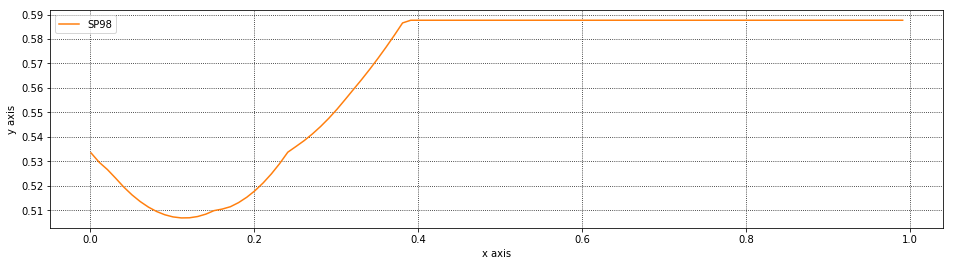

SP98 二乗誤差、最小：0.507 最適な重み：0.111



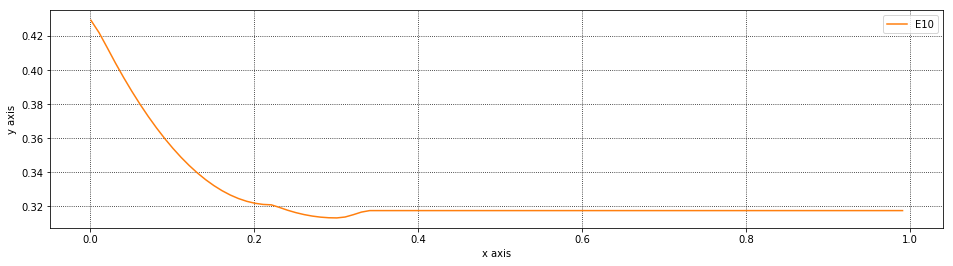

E10 二乗誤差、最小：0.313 最適な重み：0.301



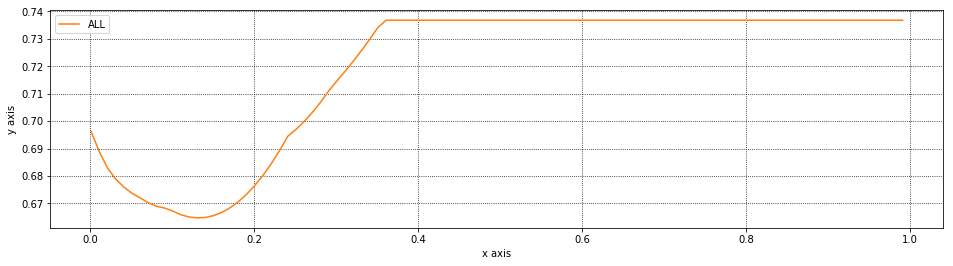

ALL 二乗誤差、最小：0.665 最適な重み：0.131



In [11]:
#グラフ表示
showOneGraph("SP98",SP98WaitMSE[:,0],SP98WaitMSE[:,1])
showOneGraph("E10",E10WaitMSE[:,0],E10WaitMSE[:,1])
showOneGraph("ALL",ALLWaitMSE[:,0],ALLWaitMSE[:,1])


## Lasso：最適化済みのパラメータによるテスト

In [12]:
# グリッドサーチにて推定したまともそうなパラメーターチェック
param = checkAParam(SP98WaitMSE[:,0],SP98WaitMSE[:,1])
ret_SP98 = lassoCVTest(X_SP98,y_SP98,param["bestWait"],5,random_Value)
printRet_Value6("SP98",ret_SP98)

param = checkAParam(E10WaitMSE[:,0],E10WaitMSE[:,1])
ret_E10 = lassoCVTest(X_E10,y_E10,param["bestWait"],5,random_Value)
printRet_Value6("E10",ret_E10)

param = checkAParam(ALLWaitMSE[:,0],ALLWaitMSE[:,1])
ret_ALL = lassoCVTest(X_ALL,y_ALL,param["bestWait"],5,random_Value)
printRet_Value8("ALL",ret_ALL)


SP98重み１：-0.000000 重み2：-0.192200 重み3：-0.053523 重み4：-0.231762 重み5：0.051435 重み6：0.089202
SP98バイアス：4.911
SP98二乗誤差：0.507

E10重み１：-0.000000 重み2：-0.000000 重み3：-0.000000 重み4：-0.034428 重み5：0.000000 重み6：0.005540
E10バイアス：4.950
E10二乗誤差：0.313

ALL重み１：-0.000000 重み2：-0.106834 重み3：-0.000000 重み4：-0.196141 重み5：0.000000 重み6：-0.000000 重み7：0.139985 重み8：0.000000
ALLバイアス：4.894
ALL二乗誤差：0.665



## Ridge：交差検証でのグリッドサーチ

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np

size   = 150
offset = 0
step   = 10
total  = offset + size * step

SP98WaitMSE = np.ones(size * 2).reshape(-1,2)
SP98WaitMSE[:,0] *= np.arange(offset,total,step)
E10WaitMSE = np.copy(SP98WaitMSE)
ALLWaitMSE = np.copy(SP98WaitMSE)

cnt = 0
for alpha_Wait in SP98WaitMSE[:,0]:
    
    ret_SP98 = ridgeCVTest(X_SP98,y_SP98,alpha_Wait,5,random_Value)
    SP98WaitMSE[cnt,1] = ret_SP98["mse"]
        
    ret_E10  = ridgeCVTest(X_E10 ,y_E10 ,alpha_Wait,5,random_Value)
    E10WaitMSE[cnt,1]  = ret_E10["mse"]

    ret_ALL  = ridgeCVTest(X_ALL ,y_ALL ,alpha_Wait,5,random_Value)
    ALLWaitMSE[cnt,1]  = ret_ALL["mse"]
    
    cnt+=1



## Ridge：パラメーターの推定結果(テストデータの切り方に依存する)

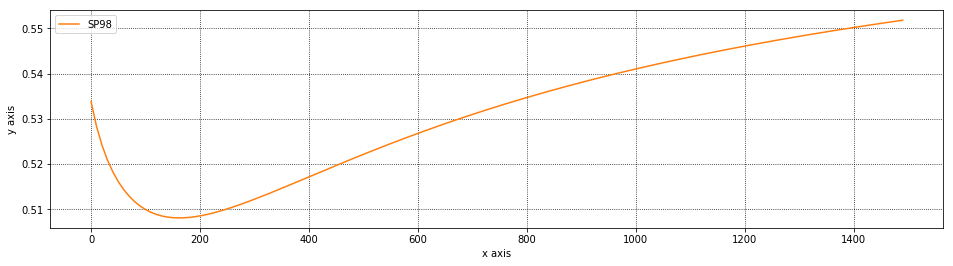

SP98 二乗誤差、最小：0.508 最適な重み：160.000



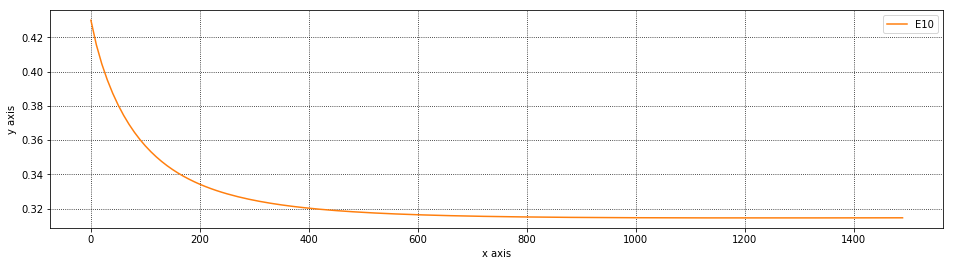

E10 二乗誤差、最小：0.315 最適な重み：1230.000



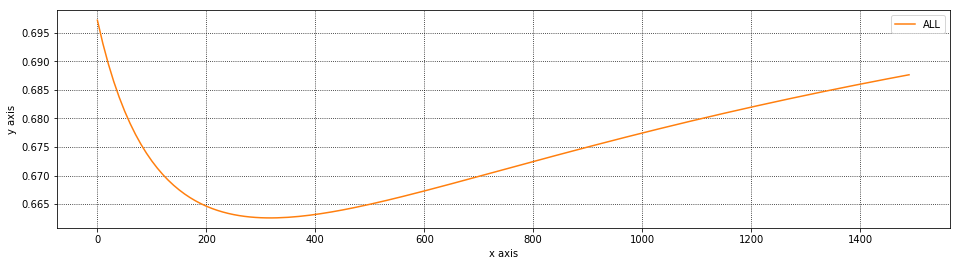

ALL 二乗誤差、最小：0.663 最適な重み：320.000



In [14]:
#グラフ表示
showOneGraph("SP98",SP98WaitMSE[:,0],SP98WaitMSE[:,1])
showOneGraph("E10",E10WaitMSE[:,0],E10WaitMSE[:,1])
showOneGraph("ALL",ALLWaitMSE[:,0],ALLWaitMSE[:,1])


## Ridge：最適化済みのパラメータによるテスト

In [15]:
# グリッドサーチにて推定したまともそうなパラメーターチェック
param = checkAParam(SP98WaitMSE[:,0],SP98WaitMSE[:,1])
ret_SP98 = ridgeCVTest(X_SP98,y_SP98,param["bestWait"],5,random_Value)
printRet_Value6("SP98",ret_SP98)

param = checkAParam(E10WaitMSE[:,0],E10WaitMSE[:,1])
ret_E10 = ridgeCVTest(X_E10,y_E10,param["bestWait"],5,random_Value)
printRet_Value6("E10",ret_E10)

param = checkAParam(ALLWaitMSE[:,0],ALLWaitMSE[:,1])
ret_ALL = ridgeCVTest(X_ALL,y_ALL,param["bestWait"],5,random_Value)
printRet_Value8("ALL",ret_ALL)


SP98重み１：-0.025608 重み2：-0.150546 重み3：-0.106083 重み4：-0.170902 重み5：0.088138 重み6：0.110926
SP98バイアス：4.911
SP98二乗誤差：0.508

E10重み１：-0.014938 重み2：-0.020680 重み3：-0.007071 重み4：-0.030718 重み5：0.006953 重み6：0.028638
E10バイアス：4.950
E10二乗誤差：0.315

ALL重み１：-0.022323 重み2：-0.107089 重み3：-0.067970 重み4：-0.143983 重み5：0.060101 重み6：-0.048963 重み7：0.124173 重み8：0.013604
ALLバイアス：4.894
ALL二乗誤差：0.663



## ElasticNet：交差検証でのグリッドサーチ

In [16]:
# alpha Param
size    = 150
offset  = 0.001
step    = 0.015
total   = offset + size * step

size_ratio = 15
l1offset   = 0.01
l1lim      = 1

SP98WaitMSE = np.ones( size * size_ratio * 3).reshape(size_ratio,-1,3)
SP98WaitMSE[:,:,0] *= np.arange(offset,total,step)
for i in range(size):
    SP98WaitMSE[:,i,2] *= np.linspace(l1offset,l1lim,size_ratio)
E10WaitMSE = np.copy(SP98WaitMSE)
ALLWaitMSE = np.copy(SP98WaitMSE)

cnt2 = 0
for l1_ratio in SP98WaitMSE[:,0,2]:
    cnt = 0
    for alpha_Wait in SP98WaitMSE[0,:,0]:
    
        ret_SP98 = elasticNetCVTest(X_SP98,y_SP98,alpha_Wait,l1_ratio,5,random_Value)
        SP98WaitMSE[cnt2,cnt,1] = ret_SP98["mse"]
        
        ret_E10  = elasticNetCVTest(X_E10 ,y_E10 ,alpha_Wait,l1_ratio,5,random_Value)
        E10WaitMSE[cnt2,cnt,1]  = ret_E10["mse"]

        ret_ALL  = elasticNetCVTest(X_ALL ,y_ALL ,alpha_Wait,l1_ratio,5,random_Value)
        ALLWaitMSE[cnt2,cnt,1]  = ret_ALL["mse"]

        cnt+=1
    cnt2+=1


In [17]:
display(SP98WaitMSE[:,0,2])
display(SP98WaitMSE[0,:,0])

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

array([1.000e-03, 1.600e-02, 3.100e-02, 4.600e-02, 6.100e-02, 7.600e-02,
       9.100e-02, 1.060e-01, 1.210e-01, 1.360e-01, 1.510e-01, 1.660e-01,
       1.810e-01, 1.960e-01, 2.110e-01, 2.260e-01, 2.410e-01, 2.560e-01,
       2.710e-01, 2.860e-01, 3.010e-01, 3.160e-01, 3.310e-01, 3.460e-01,
       3.610e-01, 3.760e-01, 3.910e-01, 4.060e-01, 4.210e-01, 4.360e-01,
       4.510e-01, 4.660e-01, 4.810e-01, 4.960e-01, 5.110e-01, 5.260e-01,
       5.410e-01, 5.560e-01, 5.710e-01, 5.860e-01, 6.010e-01, 6.160e-01,
       6.310e-01, 6.460e-01, 6.610e-01, 6.760e-01, 6.910e-01, 7.060e-01,
       7.210e-01, 7.360e-01, 7.510e-01, 7.660e-01, 7.810e-01, 7.960e-01,
       8.110e-01, 8.260e-01, 8.410e-01, 8.560e-01, 8.710e-01, 8.860e-01,
       9.010e-01, 9.160e-01, 9.310e-01, 9.460e-01, 9.610e-01, 9.760e-01,
       9.910e-01, 1.006e+00, 1.021e+00, 1.036e+00, 1.051e+00, 1.066e+00,
       1.081e+00, 1.096e+00, 1.111e+00, 1.126e+00, 1.141e+00, 1.156e+00,
       1.171e+00, 1.186e+00, 1.201e+00, 1.216e+00, 

## ElasticNet：パラメーターの推定結果(テストデータの切り方に依存する)

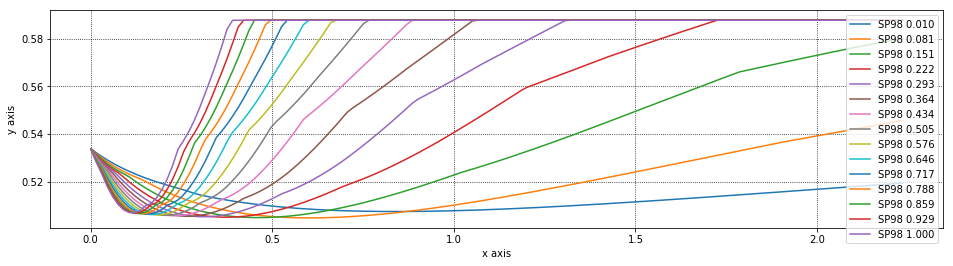

SP98  二乗誤差、最小：0.505 最適な重み：0.601 最適な比率：0.081



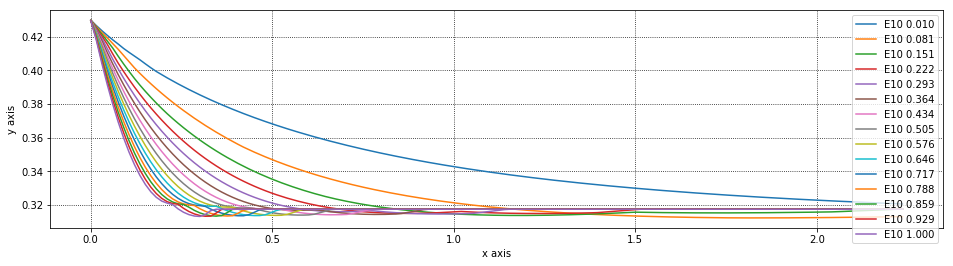

E10  二乗誤差、最小：0.312 最適な重み：1.831 最適な比率：0.081



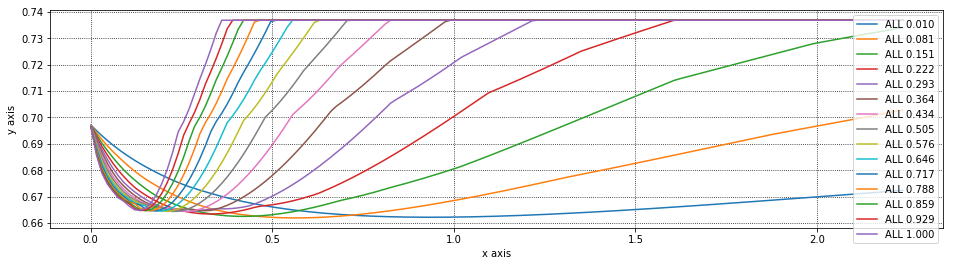

ALL  二乗誤差、最小：0.662 最適な重み：0.571 最適な比率：0.081



In [18]:
#グラフ表示
showMultiGraph("SP98",SP98WaitMSE[:,:,0],SP98WaitMSE[:,:,1],SP98WaitMSE[:,:,2])
showMultiGraph("E10", E10WaitMSE[:,:,0], E10WaitMSE[:,:,1], E10WaitMSE[:,:,2])
showMultiGraph("ALL", ALLWaitMSE[:,:,0], ALLWaitMSE[:,:,1], ALLWaitMSE[:,:,2])


## ElasticNet：最適化済みのパラメータによるテスト

In [19]:

param    = check2Param(SP98WaitMSE[:,:,0],SP98WaitMSE[:,:,1],SP98WaitMSE[:,:,2])
ret_SP98 = elasticNetCVTest(X_SP98,y_SP98,param["bestWait"],param["bestRatio"],5,random_Value)
printRet_Value6("SP98",ret_SP98)

param   = check2Param(E10WaitMSE[:,:,0], E10WaitMSE[:,:,1], E10WaitMSE[:,:,2])
ret_E10 = elasticNetCVTest(X_E10,y_E10,param["bestWait"],param["bestRatio"],5,random_Value)
printRet_Value6("E10",ret_E10)

param   = check2Param(ALLWaitMSE[:,:,0], ALLWaitMSE[:,:,1], ALLWaitMSE[:,:,2])
ret_ALL = elasticNetCVTest(X_ALL,y_ALL,param["bestWait"],param["bestRatio"],5,random_Value)
printRet_Value9("ALL",ret_ALL)


SP98重み１：-0.000000 重み2：-0.160937 重み3：-0.092470 重み4：-0.180639 重み5：0.075208 重み6：0.102923
SP98バイアス：4.911
SP98二乗誤差：0.505

E10重み１：-0.000000 重み2：-0.029004 重み3：-0.000000 重み4：-0.066416 重み5：0.000000 重み6：0.057483
E10バイアス：4.950
E10二乗誤差：0.312

ALL重み１：-0.000000 重み2：-0.121438 重み3：-0.053051 重み4：-0.169540 重み5：0.045489 重み6：-0.031170 重み7：0.138233 重み8：0.000000 重み9：-0.000000
ALLバイアス：4.894
ALL二乗誤差：0.662



In [20]:
# Lasso、Ridge、ElasticNetのどれを使ってもどんぐりの背比べの状態
# Ridge向き？

# speed：-0.120756
# temp_inside：-0.054757
# temp_outside：-0.169525
# AC：0.048508
# sun：-0.031087
# rain：0.137269
ret_ALL = elasticNetCVTest(X_ALL,y_ALL,0.571,0.081,5,random_Value)
printRet_Value7("ALL",ret_ALL)

ALL重み１：-0.000000 重み2：-0.121357 重み3：-0.052953 重み4：-0.169485 重み5：0.045365 重み6：-0.031095 重み7：0.138178
ALLバイアス：4.894
ALL二乗誤差：0.662

